In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from auto_ts import auto_timeseries

ModuleNotFoundError: No module named 'auto_ts'

In [3]:
df = pd.read_csv('DataFramePandas.csv')
df

/var/folders/8l/1n8nw8712ssfv4m1tjmf5ykd2c6n2q/T/ipykernel_90124/3884738848.py:1: DtypeWarning: Columns (7,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('DataFramePandas.csv')


,DateTime,Estacion,PM10(µg/m3),PM2.5(µg/m3),NO(ppb),NO2(ppb),NOX(ppb),SO2(ppb),CO(ppm),OZONO(ppb),Vel Viento(m/s),Dir Viento(Grados),Temperatura(°C),Presion Baro(mmHg),Rad Solar(W/M²),Precipitacion(mm),CO2(ppm),HR(%)
0,2015-01-01 01:00:00,Guaymaral,40,19.2,21.3,15.8,37.1,NaN,----,1.1,0.3,347,8,564,0,0,NaN,82.58
1,2015-01-01 02:00:00,Guaymaral,51,41,10.9,18.6,29.5,NaN,----,2.3,0.6,353,8.6,564,0,0,NaN,83.11
2,2015-01-01 03:00:00,Guaymaral,153,118.3,3.9,17.2,21.1,NaN,----,2.1,0.6,17,8.3,564,0,0,NaN,82.91
3,2015-01-01 04:00:00,Guaymaral,120,94.3,6.1,13.6,19.8,NaN,----,2.2,0.6,27,7.8,564,0,0,NaN,82.73
4,2015-01-01 05:00:00,Guaymaral,57,40.2,12.5,12.7,25.1,NaN,----,1.3,0.4,357,6.7,564,0,0,NaN,82.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430823,2023-08-08 20:00:00,Usme,13.5,5.3,7.5,17.4,25,1,0.8,8.8,NaN,NaN,14.8,564,0,0,NaN,NaN
1430824,2023-08-08 21:00:00,Usme,34.3,4.8,10.1,17.6,27.6,0.3,0.8,6.8,NaN,NaN,14.3,564,0,0,NaN,NaN
1430825,2023-08-08 22:00:00,Usme,24.8,4.4,5.6,15,20.6,3,0.5,8.3,NaN,NaN,13.6,565,0,0,NaN,NaN
1430826,2023-08-08 23:00:00,Usme,14.4,4.3,6.7,14.5,21.2,0.6,0.5,8.6,NaN,NaN,13.7,565,0,0,NaN,NaN


In [16]:
def replace_strings_with_nan(df, columns, strings):
    for column in columns:
        for string in strings:
            df[column] = df[column].replace(string, pd.np.nan)
    return df

df_clean = replace_strings_with_nan(df, ['PM10(µg/m3)', 'HR(%)'], ['----', ''])

/var/folders/8l/1n8nw8712ssfv4m1tjmf5ykd2c6n2q/T/ipykernel_90124/1933943099.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df[column] = df[column].replace(string, pd.np.nan)


In [23]:
def fill_na_with_mean(df_filtered, column):
    """ fill na with movil mean of 3 days"""
    df_filtered[column] = df_filtered[column].fillna(df_filtered[column].rolling(3, min_periods=1).mean())
    return df_filtered

estaciones = df_clean.Estacion.unique()

# Aquí lo hago con solo la primer columna pero la ídea es que lo hagan con la columna que quieren predecir
# Creo que es el ICA pero no la vi, no estoy seguro

all_dfs = []
for estacion in estaciones:
    df_filtered = df_clean[df_clean.Estacion == estacion]
    df_filtered = fill_na_with_mean(df_filtered, 'PM10(µg/m3)')
    df_filtered = df_filtered[['DateTime', 'Estacion','PM10(µg/m3)']]
    all_dfs.append(df_filtered)

df_check = pd.concat(all_dfs).fillna(method='ffill')
df_check['DateTime'] = pd.to_datetime(df_check['DateTime'])
df_check['PM10(µg/m3)'] = df_check['PM10(µg/m3)'].astype('float')
df_check = df_check.sort_values(by=['DateTime', 'Estacion'])
df_check

/var/folders/8l/1n8nw8712ssfv4m1tjmf5ykd2c6n2q/T/ipykernel_90124/1446209853.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[column] = df_filtered[column].fillna(df_filtered[column].rolling(3, min_periods=1).mean())
/var/folders/8l/1n8nw8712ssfv4m1tjmf5ykd2c6n2q/T/ipykernel_90124/1446209853.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[column] = df_filtered[column].fillna(df_filtered[column].rolling(3, min_periods=1).mean())
/var/folders/8l/1n8nw8712ssfv4m1tjmf5ykd2c6n2q/T/i

,DateTime,Estacion,PM10(µg/m3)
452448,2015-01-01 01:00:00,Bolivia,21.9
603264,2015-01-01 01:00:00,CarvajalSevillana,63.2
226224,2015-01-01 01:00:00,CentroAltoRendimiento,65.0
301632,2015-01-01 01:00:00,CiudadBolivar,6.0
527856,2015-01-01 01:00:00,Colina,28.4
...,...,...,...
1129967,2023-08-08 23:59:00,SanCristobal,13.0
1205183,2023-08-08 23:59:00,Suba,47.8
1280399,2023-08-08 23:59:00,Tunal,12.0
1355615,2023-08-08 23:59:00,Usaquen,8.0


In [25]:
df_check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430828 entries, 452448 to 1430827
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   DateTime     1430828 non-null  datetime64[ns]
 1   Estacion     1430828 non-null  object        
 2   PM10(µg/m3)  1430828 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 43.7+ MB


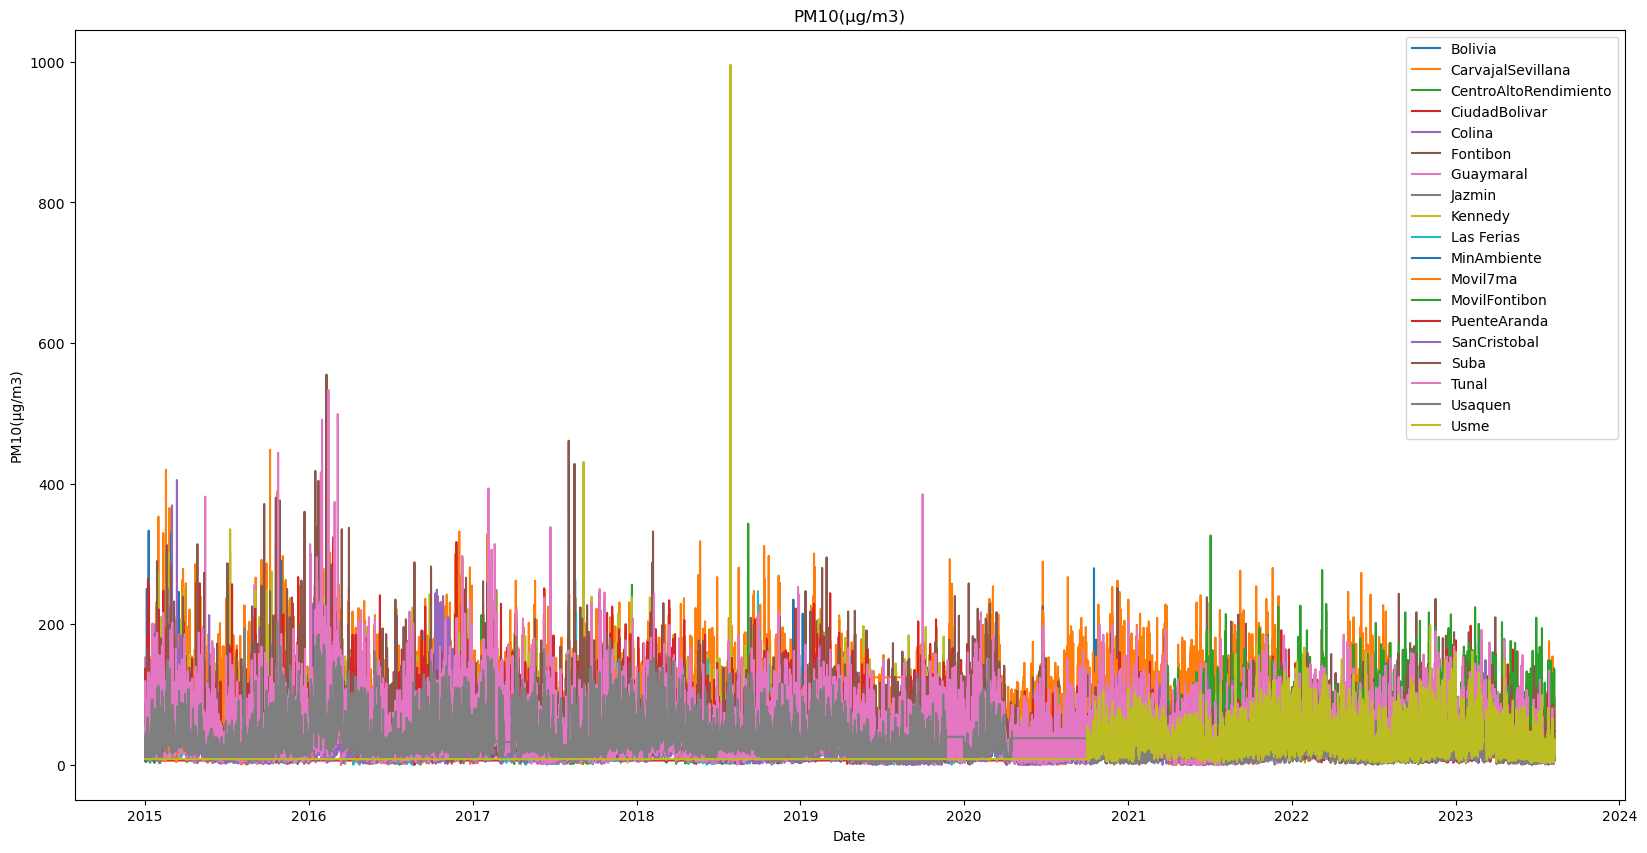

(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'PM10(µg/m3)'}, xlabel='Date', ylabel='PM10(µg/m3)'>)

In [29]:
def plot_all_stations(df, column):
    """ plot all stations in the same figure"""
    fig, ax = plt.subplots(figsize=(20, 10))
    for estacion in df.Estacion.unique():
        df_filtered = df[df.Estacion == estacion]
        ax.plot(df_filtered.DateTime, df_filtered[column], label=estacion)
    ax.legend()
    ax.set_title(column)
    ax.set_xlabel('Date')
    ax.set_ylabel(column)
    plt.show()
    return fig, ax

plot_all_stations(df_check, 'PM10(µg/m3)')

In [32]:
train_df = df_check.iloc[:int(len(df_check) * 0.9)]
test_df = df_check.iloc[int(len(df_check) * 0.9):]
print(train_df.shape, test_df.shape)

(1287745, 3) (143083, 3)


In [34]:
# Lo hago con 3 para probar, ustedes creo que si lo tienen que hacer con todas
station_test = test_df.Estacion.unique()[0:3]
station_test

array(['PuenteAranda', 'SanCristobal', 'Suba'], dtype=object)

In [36]:
train_df

,DateTime,Estacion,PM10(µg/m3)
452448,2015-01-01 01:00:00,Bolivia,21.9
603264,2015-01-01 01:00:00,CarvajalSevillana,63.2
226224,2015-01-01 01:00:00,CentroAltoRendimiento,65.0
301632,2015-01-01 01:00:00,CiudadBolivar,6.0
527856,2015-01-01 01:00:00,Colina,28.4
...,...,...,...
143272,2022-09-28 17:00:00,Kennedy,50.4
746368,2022-09-28 17:00:00,Las Ferias,49.5
821584,2022-09-28 17:00:00,MinAmbiente,40.3
896800,2022-09-28 17:00:00,Movil7ma,52.1


<Axes: title={'center': 'PuenteAranda'}>

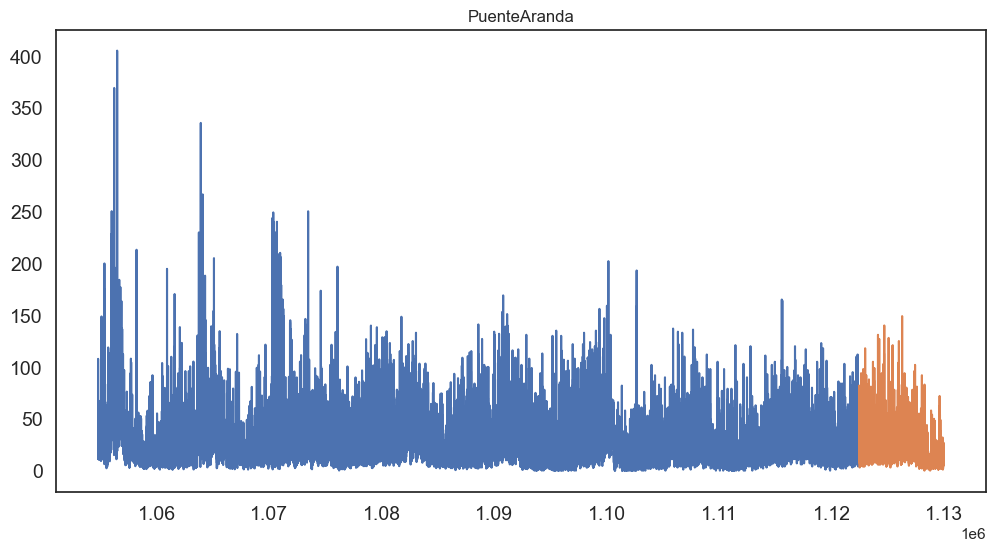

In [40]:
train_df[train_df.Estacion == station_test[1]]['PM10(µg/m3)'].plot(figsize=(12, 6), title=station_test[0], fontsize=14, label='train')
test_df[test_df.Estacion == station_test[1]]['PM10(µg/m3)'].plot(figsize=(12, 6), title=station_test[0], fontsize=14, label='test')

In [41]:
train_df[train_df.Estacion == station_test[1]]

,DateTime,Estacion,PM10(µg/m3)
1054752,2015-01-01 01:00:00,SanCristobal,45.2
1054753,2015-01-01 02:00:00,SanCristobal,91.7
1054754,2015-01-01 03:00:00,SanCristobal,107.8
1054755,2015-01-01 04:00:00,SanCristobal,54.8
1054756,2015-01-01 05:00:00,SanCristobal,103.7
...,...,...,...
1122443,2022-09-28 12:00:00,SanCristobal,58.0
1122444,2022-09-28 13:00:00,SanCristobal,70.0
1122445,2022-09-28 14:00:00,SanCristobal,35.0
1122446,2022-09-28 15:00:00,SanCristobal,44.0


In [ ]:
# El seasonal period es 24 porque es horario https://github.com/AutoViML/Auto_TS

train_df

model_station = {}

for station in station_test:

    model = auto_timeseries(score_type='rmse', forecast_period=30, non_seasonal_pdq=None, seasonal=True, seasonal_period=24, model_type='best', verbose=0)
    model.fit(traindata=train_df[train_df.Estacion == station][['DateTime', 'PM10(µg/m3)']], ts_column='DateTime', target='PM10(µg/m3)')
    model_station[station] = model

In [50]:
# El seasonal period es 60 porque es horario https://github.com/AutoViML/Auto_TS, creo que aquí deberían cambiar el DateTime a horario
model = auto_timeseries(score_type='rmse', forecast_period=30, non_seasonal_pdq=None, seasonal=True, seasonal_period=60, model_type='best', verbose=0)
model.fit(traindata=train_df[train_df.Estacion == station_test[1]][['DateTime', 'PM10(µg/m3)']], ts_column='DateTime', target='PM10(µg/m3)')

Start of Fit.....
    Target variable given as = PM10(µg/m3)
Start of loading of data.....
    Inputs: ts_column = DateTime, sep = ,, target = ['PM10(µg/m3)']
    Using given input: pandas dataframe...
    DateTime column exists in given train data...
    train data shape = (67696, 1)
Alert: Could not detect strf_time_format of DateTime. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model
    No time series plot since verbose = 0. Continuing
Time Interval between observations has not been provided. Auto_TS will try to infer this now...


UnboundLocalError: local variable 'diff_in_days' referenced before assignment